# Hiyerarsik Kümeleme Analizi

### Hiyerarsik kümleeme analizi, denetimisiz makine ogrenimi yontemlerinden biridir. Bu yontemde amac, gözlemleri birbirlerine olan benzerliklerine gore alt kümlere ayirmaktir. Fakat, buradaki kümelere ayirma islemi, hiyerarsik olarak gerceklesir. Birlestirici ve bolumleyici olarak iki genel baslik vardir. 

<img src='https://www.clicdata.com/wp-content/uploads/2020/11/agglomerative-vs-divisive-hierarchical-clustering-example.png' alt='hiyerarsik'>

### Birlestirici yontemde, calismanin basinda butun gozlem birimleri tek basina bir küme gibi dusunulup yukariya dogru iki gozlem birimi bir araya gelip bir küme olusturur. Sonra iki veya üc gozlemden olusan iki küme bir araya gelerek baska bir küme olusturur seklinde yukariya dogru birlestirerek islemler yapilir.

### Bolümleyici ümlemede ise tüm gözlemler bir arada oldugunda tek bir kümedir, sonra iki küme elde edilir vb seklinde bölünerek bölümleyici bir sekilde asagiya dogru tüm veri seti, her bir gozlem tek basina kalacak sekilde asagiya dogru olusturulur. 

### Hiyerarsik kümeleme yontemi, asagi veya yukari dogru yani bolumleyici veya birlestirici sekilde gozlem birimlerini kümlere sokmaya dayanmaktadir. KMeans yonteminden farki, KMeans yonteminde küme olusturma surecine mudahale edilmezken, dolyisiyl gozlemleme imkani olmamaktadir, bu durum hiyerarsik kümelemede tam tersidir. 

In [67]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/us-arrests/us_arrests.csv


# Veri setini okuma

In [68]:
df = pd.read_csv('/kaggle/input/us-arrests/us_arrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


# Veri setinin standartlastirilmasi

In [69]:
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

### Birlestirici yontem, oklid uzakligina gore gozlem birimlerini kümlere ayirir.

In [70]:
hc_average = linkage(df, 'average')

### Hiyerarsik kümleme yontemlerinin temel noktasi, 'dendrogram' adi verilen semadir. Dendogram semasi, asagidaki gibi olusturulur. 

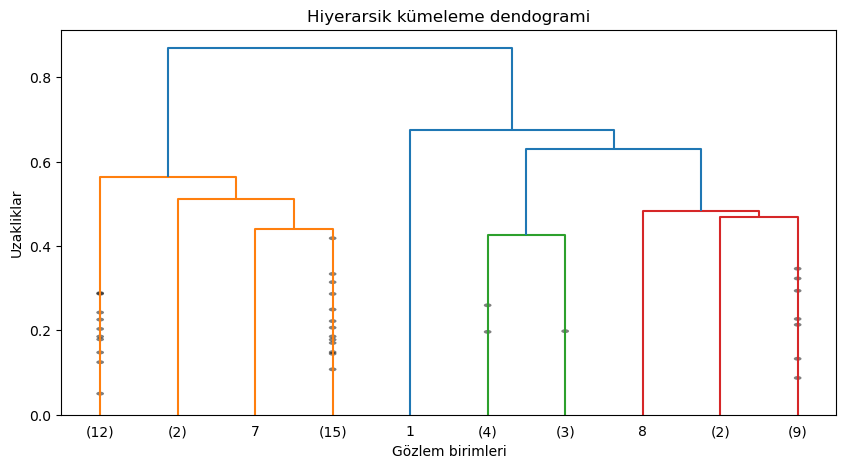

In [71]:
plt.figure(figsize=(10, 5))
plt.title('Hiyerarsik kümeleme dendogrami')
plt.xlabel('Gözlem birimleri')
plt.ylabel('Uzakliklar')
dendrogram(hc_average, truncate_mode='lastp', p=10, show_contracted=True, leaf_font_size=10)
plt.show()

### Hiyerarsik kümleme yonteminin avantajlarindan biri de, gozlem birimlerine genelden bakma imkani sunmasidir.

# Hiyerarsik küme sayisini belirleme

### Küme sayisi, asagidaki gibi belirlenir.

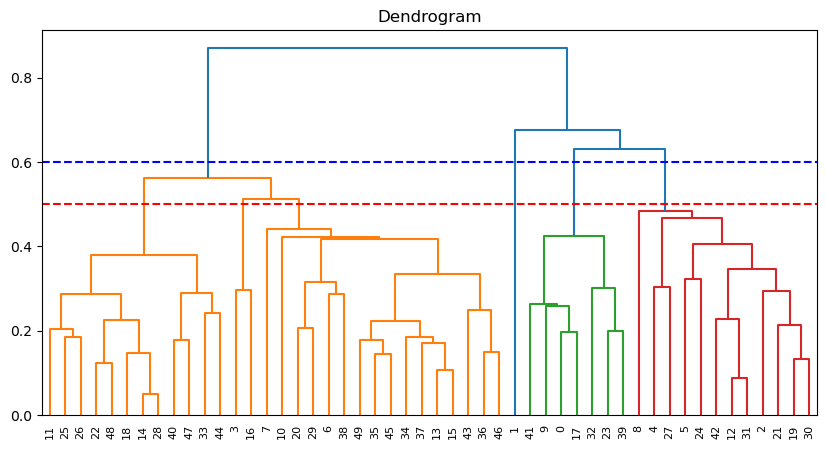

In [72]:
plt.figure(figsize=(10, 5))
plt.title('Dendrogram')
dend = dendrogram(hc_average)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.6, color='b', linestyle='--')
plt.show()

### Yukaridaki sekilde, cizginin kestigi nokta sayisi kadar kümeleme yapilabilir. Böylece küme sayisi bes olarak belirlenebilir.

# Final modeli olusturma ve hangi gözlem biriminin hangi sinifta olacagi bilgisini verme

In [73]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='average')

### Birlestirici kümeleme yonteminin kendi icinde bazi farkliliklari vardir. 'linkage' altinda "word, complete, average ve single" yontemleri vardir. Yayginca kullanilan iki yontem "word" ve "average" dir. Dolayisiyla bu calisma icin "linkage" argümani "average" olarak girilebilir. 

In [74]:
clusters = cluster.fit_predict(df)

# Veri setini bastan okuma ve dataframe icerisine tahmin edilen kümeleri ekleme

In [75]:
df = pd.read_csv('/kaggle/input/us-arrests/us_arrests.csv', index_col=0)
df['hi_cluster_no'] = clusters
# Sifirdan baslamasini istemedigimize asagidaki islem yapilabilir.
df['hi_cluster_no'] = df['hi_cluster_no'] + 1
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


# Küme numaralarina göre eyaletleri getirelim

### Oncelikle indexteki eyaletleri degisken olarak güncelleyelim. Bu asagidaki gibi yapilabilir.

In [76]:
df = df.reset_index()
df.rename(columns = {'index':'state'}, inplace = True)
df.head()

,state,Murder,Assault,UrbanPop,Rape,hi_cluster_no
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [77]:
for i in df['hi_cluster_no'].unique():
    print(f'\nKüme numarasi {i} olan eyaletler')
    print(df['state'][df['hi_cluster_no'] == i])


Küme numarasi 4 olan eyaletler
0            Alabama
9            Georgia
17         Louisiana
23       Mississippi
32    North Carolina
39    South Carolina
41         Tennessee
Name: state, dtype: object

Küme numarasi 3 olan eyaletler
1    Alaska
Name: state, dtype: object

Küme numarasi 2 olan eyaletler
2        Arizona
4     California
5       Colorado
8        Florida
12      Illinois
19      Maryland
21      Michigan
24      Missouri
27        Nevada
30    New Mexico
31      New York
42         Texas
Name: state, dtype: object

Küme numarasi 1 olan eyaletler
3          Arkansas
6       Connecticut
7          Delaware
10           Hawaii
13          Indiana
15           Kansas
16         Kentucky
20    Massachusetts
29       New Jersey
34             Ohio
35         Oklahoma
36           Oregon
37     Pennsylvania
38     Rhode Island
43             Utah
45         Virginia
46       Washington
49          Wyoming
Name: state, dtype: object

Küme numarasi 5 olan eyaletler
11       

# Thank you for checking my notebook!